## Import Libraries
In your notebook, start by importing the necessary libraries:

In [1]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure matplotlib for inline plotting
%matplotlib inline

## Enable FastF1 Cache
Enable caching to store data locally and speed up data loading:

In [2]:
fastf1.Cache.enable_cache('../data')  # Cache data in the 'data' directory

# Collecting Historical Data
To train a machine learning model, we'll need data from multiple races. Let's collect data from several races and seasons.

## Define a Function to Collect Race Data

In [3]:
def collect_race_data(years, race_names):
    all_results = []
    all_laps = []
    all_qualy = []
    all_car_data = []
    all_positions = []

    for year in years:
        for race_name in race_names:
            try:
                fastf1.Cache.offline_mode(enabled=True)
                # Load race session
                session = fastf1.get_session(year, race_name, 'R')

                if session is None:
                    print(f"Session not found for {year} {race_name}")
                    continue

                session.load()

                results = session.results
                results['Year'] = year
                results['RaceName'] = race_name
                all_results.append(results)

                # Collect lap data
                laps = session.laps
                weather_data = laps.get_weather_data()
                laps = laps.reset_index(drop=True)
                weather_data = weather_data.reset_index(drop=True)
                joined = pd.concat([laps, weather_data.loc[:, ~(weather_data.columns == 'Time')]], axis=1)
                laps['Year'] = year
                laps['RaceName'] = race_name
                all_laps.append(joined)

                # Collect telemetry and positional data
                car_data = session.car_data
                pos_data = session.pos_data

                # Collect telemetry data for each driver
                for driver in session.drivers:
                    # Collect telemetry for the driver
                    if driver in car_data:
                        driver_car_data = car_data[driver]
                        driver_car_data['DriverNumber'] = driver
                        driver_car_data['Year'] = year
                        driver_car_data['RaceName'] = race_name
                        all_car_data.append(driver_car_data)

                    # Collect positional data for the driver
                    if driver in pos_data:
                        driver_pos_data = pos_data[driver]
                        driver_pos_data['DriverNumber'] = driver
                        driver_pos_data['Year'] = year
                        driver_pos_data['RaceName'] = race_name
                        all_positions.append(driver_pos_data)

                # Load qualifying session
                qualy_session = fastf1.get_session(year, race_name, 'Q')
                qualy_session.load()
                qualy_results = qualy_session.results
                qualy_results['Year'] = year
                qualy_results['RaceName'] = race_name
                all_qualy.append(qualy_results[['DriverNumber', 'Position']].rename(columns={'Position': 'QualiPosition'}))

                print(f"Loaded data for {race_name} {year}")
            except Exception as e:
                print(f"Error loading {race_name} {year}: {e}")

    # Concatenate all results and laps dataframes
    all_results_df = pd.concat(all_results, ignore_index=True)
    all_laps_df = pd.concat(all_laps, ignore_index=True)
    all_qualy_df = pd.concat(all_qualy, ignore_index=True)
    all_car_data = pd.concat(all_car_data, ignore_index=True)
    all_positions_df = pd.concat(all_positions, ignore_index=True)

    return all_results_df, all_laps_df, all_qualy_df, all_car_data, all_positions_df


## Collect Data
Specify the years and races you're interested in:

In [4]:
# years = [2020, 2021, 2023, 2024]
# race_names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
years = [2020]
race_names = [1,2,3]
# Collect the data
results, laps, qualy, car_data, positions = collect_race_data(years, race_names)

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 77: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  4: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 44: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 11: Lap timing integrity check failed for 1 

Loaded data for 1 2020


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '23', '4', '11', '18', '3', '55', '26', '7', '20', '8', '99', '10', '63', '6', '31', '16', '5']
core           INFO 	Loading data for Styrian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
/Users/karrtopelka/Developer/lnu/f1-v1/venv/lib/python3.12/site-packages/fastf1/core.py:1580: FutureWarning: Se

Loaded data for 2 2020


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '18', '23', '5', '11', '3', '55', '20', '16', '26', '4', '31', '7', '8', '99', '63', '6', '10']
core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


Loaded data for 3 2020


## Save the Data
Optionally, save the collected data to a CSV file for future use:



In [13]:
results.to_csv('../data/historical_results.csv', index=False)
laps.to_csv('../data/historical_laps.csv', index=False)
qualy.to_csv('../data/historical_qualy.csv', index=False)
car_data.to_csv('../data/historical_car_data.csv', index=False)
positions.to_csv('../data/historical_positions.csv', index=False)

# Feature Engineering
Create features that may help the model predict race outcomes.

## Example Features
- Average Lap Time
- Top Speed
- Number of Pit Stops
- Qualifying Position
- Tyre Choices
- Weather Conditions

## Calculating Average Lap Time

In [5]:
# Merge lap times with driver results
lap_times = results.merge(laps, on='DriverNumber')

# Calculate average lap time per driver
avg_lap_times = lap_times.groupby('DriverNumber')['LapTime'].mean().reset_index()
avg_lap_times.rename(columns={'LapTime': 'AvgLapTime'}, inplace=True)

# Merge with results
results_df = results[['DriverNumber', 'FullName', 'TeamName', 'Position', 'Points', 'Status']]
results_with_features = pd.merge(results_df, avg_lap_times, on='DriverNumber')


## Top Speed
Objective: Calculate the maximum speed reached by each driver during the race.

In [6]:
# Calculate top speed per driver
# Note: Ensure 'SpeedST' or 'Speed' is available in your laps data
if 'SpeedST' in laps.columns:
    speed_column = 'SpeedST'
elif 'Speed' in laps.columns:
    speed_column = 'Speed'
else:
    print("Speed data not available in laps dataframe.")
    speed_column = None

if speed_column:
    top_speeds = laps.groupby('DriverNumber')[speed_column].max().reset_index()
    top_speeds.rename(columns={speed_column: 'TopSpeed'}, inplace=True)

    # Merge with results_with_features
    results_with_features = pd.merge(results_with_features, top_speeds, on='DriverNumber', how='left')
else:
    print("Top Speed feature cannot be added due to missing speed data.")


In [7]:
# Aggregate telemetry features for each driver
car_telemetry_features = car_data.groupby('DriverNumber').agg({
    'Speed': ['mean', 'max'],  # Calculate both average and max speed
    'RPM': 'mean',             # Average RPM
    'Throttle': 'mean',        # Average throttle usage
    'Brake': 'mean'            # Average brake usage
}).reset_index()


# Rename the columns properly to avoid conflicts
car_telemetry_features.columns = ['DriverNumber', 'AvgSpeed', 'MaxSpeed', 'AvgRPM', 'AvgThrottle', 'AvgBrake']

# Merge telemetry features with the main dataset
results_with_features = pd.merge(results_with_features, car_telemetry_features, on='DriverNumber', how='left')

In [8]:
# Filter out invalid position data
valid_positions = positions[(positions['X'] != 0) & (positions['Y'] != 0) & (positions['Status'] != 'OffTrack')]

# Aggregate positional features for each driver
positional_features = valid_positions.groupby('DriverNumber').agg({
    'X': 'mean',  # Average X position on track
    'Y': 'mean',  # Average Y position on track
    'Z': 'mean',  # Average Z position (altitude, if relevant)
    'Time': 'count'  # Number of valid position samples
}).reset_index()

# Rename the columns for clarity
positional_features.rename(columns={
    'X': 'AvgXPosition',
    'Y': 'AvgYPosition',
    'Z': 'AvgZPosition',  # Optional, if Z is relevant
    'Time': 'NumPositionSamples'  # Total number of valid position data points
}, inplace=True)

# Merge positional features with the main dataset
results_with_features = pd.merge(results_with_features, positional_features, on='DriverNumber', how='left')

Explanation:

- SpeedST: Speed trap data, which records the highest speed at a specific point.
- Speed: General speed data from telemetry.
- We check which speed data is available and use it to calculate the top speed.
- If speed data is not available, we skip this feature.

## Number of Pit Stops
Objective: Count the number of pit stops each driver made during the race.

In [9]:
# Identify pit laps where 'PitInTime' is not null
pit_laps = laps[laps['PitInTime'].notnull()]
# Count pit stops per driver
pit_stop_counts = pit_laps.groupby('DriverNumber').size().reset_index(name='NumPitStops')

# Merge with results_with_features
results_with_features = pd.merge(results_with_features, pit_stop_counts, on='DriverNumber', how='left')
# Fill NaN values with 0 for drivers without pit stops
results_with_features['NumPitStops'].fillna(0, inplace=True)


/var/folders/3r/y8q1_zkx3l333fyh9s34n0180000gn/T/ipykernel_72639/2102567290.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  results_with_features['NumPitStops'].fillna(0, inplace=True)


Explanation:

- PitInTime indicates when a driver enters the pit lane.
- We count the number of times each driver has a non-null PitInTime.
- Merge the pit stop counts into our features dataframe.

## Qualifying Position
Objective: Include each driver's qualifying position as a feature.

In [10]:
# Merge qualifying position into results_with_features
results_with_features = pd.merge(results_with_features, qualy, on='DriverNumber', how='left')

## Tyre Choices
Objective: Include the most frequently used tyre compound by each driver.

In [11]:
# Extract tyre compound information
tyre_compounds = laps[['DriverNumber', 'Compound']]

# Determine the most used compound for each driver
most_used_compound = tyre_compounds.groupby('DriverNumber')['Compound'].agg(lambda x: x.value_counts().index[0]).reset_index()
most_used_compound.rename(columns={'Compound': 'MostUsedCompound'}, inplace=True)

# One-hot encode the tyre compounds
tyre_dummies = pd.get_dummies(most_used_compound['MostUsedCompound'], prefix='Tyre')

# Merge with driver data
most_used_compound = pd.concat([most_used_compound, tyre_dummies], axis=1)

# Merge with results_with_features
results_with_features = pd.merge(results_with_features, most_used_compound.drop('MostUsedCompound', axis=1), on='DriverNumber', how='left')

Explanation:

- We identify the most frequently used tyre compound for each driver.
- Use one-hot encoding to convert categorical tyre compounds into numerical features.

## Weather Conditions
Objective: Include average weather conditions during the race.

In [12]:
# Extract weather data
weather_data = laps[['DriverNumber', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed']]

# Average weather conditions per driver
avg_weather = weather_data.groupby('DriverNumber').mean().reset_index()

# Merge with results_with_features
results_with_features = pd.merge(results_with_features, avg_weather, on='DriverNumber', how='left')

Note: Since weather conditions are generally the same for all drivers at the same time, including them might not add significant predictive power.

In [14]:
# Calculate average pit stop duration per driver
pit_stop_durations = pit_laps.groupby('DriverNumber')['PitOutTime'].mean().reset_index()
pit_stop_durations.rename(columns={'PitOutTime': 'AvgPitStopDuration'}, inplace=True)

# Merge with results_with_features
results_with_features = pd.merge(results_with_features, pit_stop_durations, on='DriverNumber', how='left')

In [25]:
# We have to Convert timedelta Features to Seconds
import fastf1.utils as f1_utils

# Convert timedelta features to seconds
time_features = ['AvgLapTime', 'AvgPitStopDuration']
for feature in time_features:
    results_with_features[feature] = pd.to_timedelta(results_with_features[feature]).dt.total_seconds()

# Building a Machine Learning Model
We'll start with a simple model to predict the finishing position based on the features.



## Prepare the Data

In [44]:
# Select features and target variable
features = ['AvgLapTime', 'TopSpeed', 'NumPitStops', 'QualiPosition', 'AvgThrottle', 'AvgBrake', 'AvgSpeed', 'MaxSpeed', 'AvgRPM', 'AvgXPosition', 'AvgYPosition', 'AvgZPosition', 'NumPositionSamples'] + list(tyre_dummies.columns) + ['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed', 'AvgPitStopDuration']
target = 'Position'

# Handle missing values if any
results_with_features.dropna(subset=features + [target], inplace=True)


# Define X and y
X = results_with_features[features]
y = results_with_features[target]


## Split the Data

In [45]:
from sklearn.model_selection import train_test_split

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the Features (Optional):

In [46]:
from sklearn.preprocessing import StandardScaler

# List continuous features to scale
continuous_features = ['AvgLapTime', 'TopSpeed', 'NumPitStops', 'QualiPosition',
                       'AvgThrottle', 'AvgBrake', 'AvgSpeed', 'MaxSpeed',
                       'AvgRPM', 'AvgXPosition', 'AvgYPosition',
                       'AirTemp', 'Humidity', 'Pressure', 'TrackTemp',
                       'WindDirection', 'WindSpeed']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale only the continuous features
X_train_continuous = scaler.fit_transform(X_train[continuous_features])
X_test_continuous = scaler.transform(X_test[continuous_features])

# Convert scaled features back to DataFrame for easy concatenation with categorical features
X_train_continuous_df = pd.DataFrame(X_train_continuous, columns=continuous_features, index=X_train.index)
X_test_continuous_df = pd.DataFrame(X_test_continuous, columns=continuous_features, index=X_test.index)

In [47]:
# Combine the scaled continuous features with the categorical (unscaled) features
X_train_final = pd.concat([X_train_continuous_df, X_train.drop(columns=continuous_features)], axis=1)
X_test_final = pd.concat([X_test_continuous_df, X_test.drop(columns=continuous_features)], axis=1)

## Train the Model

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate the Model

In [49]:
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 4.717333333333334


## Saving the Trained Model
You can save the trained model using joblib:

In [50]:
import joblib

# Save the model
joblib.dump(model, '../models/f1_model_2.pkl')

# Save the scaler if you used one
joblib.dump(scaler, '../models/scaler_2.pkl')


['../models/scaler_2.pkl']

## Feature Importance:

Analyze which features are most important in your model.

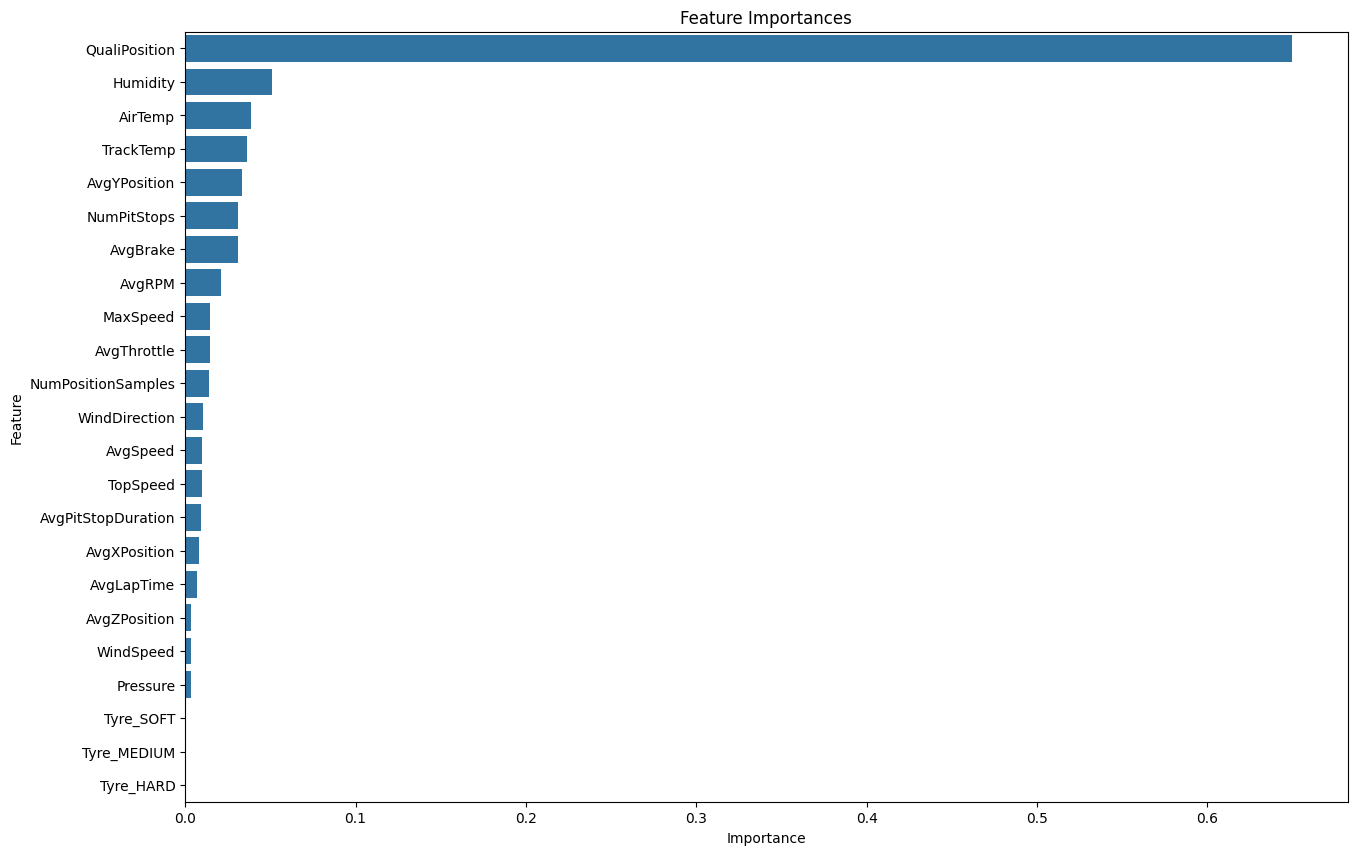

In [51]:
# Get feature importances
importances = model.feature_importances_
feature_names = features

# Create a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.show()


In [52]:
feature_importance_df

,Feature,Importance
3,QualiPosition,0.649875
17,Humidity,0.050910
16,AirTemp,0.038849
19,TrackTemp,0.036046
10,AvgYPosition,0.033493
2,NumPitStops,0.031125
5,AvgBrake,0.030899
8,AvgRPM,0.021292
7,MaxSpeed,0.014692
4,AvgThrottle,0.014564


## Residual Analysis

Plot Residuals: Analyze the difference between predicted and actual positions.

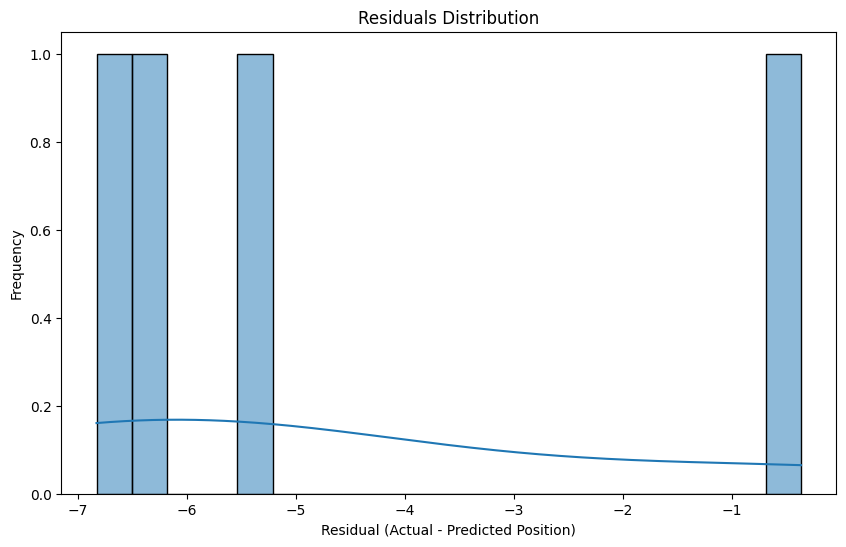

In [53]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted Position)')
plt.ylabel('Frequency')
plt.show()

Observation: Look for patterns in residuals. If residuals are not randomly distributed, it may indicate model biases.

In [54]:
# Check alignment
mismatches = results_with_features[results_with_features['QualiPosition'].isnull()]
print(f"Number of drivers without qualifying position: {len(mismatches)}")

Number of drivers without qualifying position: 0


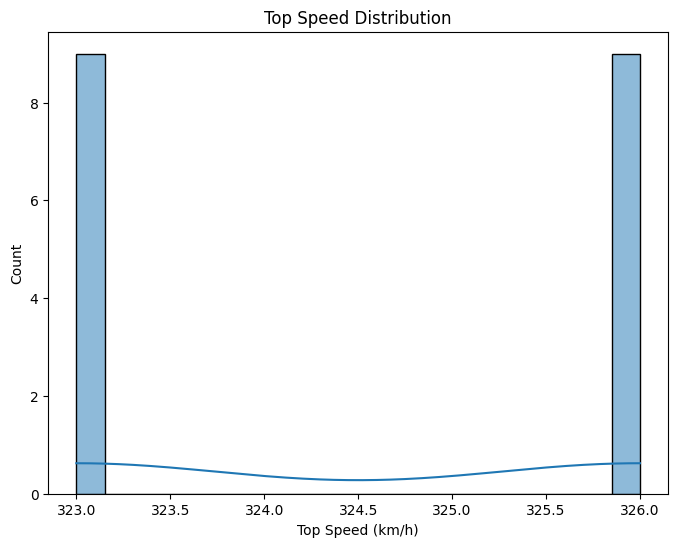

In [55]:
plt.figure(figsize=(8,6))
sns.histplot(results_with_features['TopSpeed'], bins=20, kde=True)
plt.title('Top Speed Distribution')
plt.xlabel('Top Speed (km/h)')
plt.show()

In [56]:
# Check variance in weather features
weather_features = ['AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed']
variance = results_with_features[weather_features].var()
print(variance)

AirTemp          0.001699
Humidity         0.084815
Pressure         0.095695
TrackTemp        0.040916
WindDirection    0.323021
WindSpeed        0.000254
dtype: object


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimized Mean Absolute Error: {mae}")

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_scores.mean()
print(f"Cross-Validated MAE: {mean_cv_mae}")

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"XGBoost MAE: {mae}")

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"LightGBM MAE: {mae}")

In [ ]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"CatBoost MAE: {mae}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

xx_train = np.array(X_train)
xx_test = np.array(X_test)
yy_train = np.array(y_train)
yy_test = np.array(y_test)

# Verify the data types and shapes
print(f"xx_train type: {type(xx_train)}, shape: {xx_train.shape}")
print(f"xx_test type: {type(xx_test)}, shape: {xx_test.shape}")
print(f"yy_train type: {type(yy_train)}, shape: {yy_train.shape}")
print(f"yy_test type: {type(yy_test)}, shape: {yy_test.shape}")

nn_model = Sequential()
nn_model.add(Dense(64, input_dim=xx_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(optimizer='adam', loss='mean_absolute_error')
nn_model.fit(xx_train, yy_train, epochs=100, batch_size=8, verbose=0)

y_pred = nn_model.predict(xx_test).flatten()
mae = mean_absolute_error(yy_test, y_pred)
print(f"Neural Network MAE: {mae}")

In [ ]:
# Driver and Team Selection
driver_list = results_with_features['DriverNumber'].unique().tolist()
selected_driver = st.selectbox('Select Driver', driver_list)

team_list = results_with_features['TeamName'].unique().tolist()
selected_team = st.selectbox('Select Team', team_list)

# Encode driver and team
driver_features = [1 if f'Driver_{selected_driver}' == col else 0 for col in driver_dummies.columns]
team_features = [1 if f'Team_{selected_team}' == col else 0 for col in team_dummies.columns]

# Create input DataFrame
input_data = {
    'NormalizedAvgLapTime': normalized_avg_lap_time,
    'TopSpeed': top_speed,
    'NumPitStops': num_pit_stops,
    'QualiPosition': quali_position,
    # Add other features
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Append driver and team features
input_df = pd.concat([input_df, pd.DataFrame([driver_features + team_features], columns=driver_dummies.columns.tolist() + team_dummies.columns.tolist())], axis=1)

# Ensure feature order
input_df = input_df[features]

# Scale input data
input_scaled = scaler.transform(input_df)
